# Digital image processing in Python 3 - part I: digital image filters

goals of image filtering:
- reduce noise
- let details stand out
- ...

## Preparations

### Necessary modules

In [22]:
%matplotlib inline
import numpy as np                #working with arrays
import matplotlib.pyplot as plt   #plot an image
import matplotlib.image as mpimg
import skimage
from PIL import Image             #convert array to image

### Create a rgb picture

#### Some colors

In [80]:
red           = [255,0  ,0  ]
red_violet    = [255,0  ,64 ]
red_wine      = [191,0  ,26 ]
dark_red      = [64 ,0  ,0  ]
green         = [0  ,255,0  ]
blue          = [0  ,0  ,255]
dark_blue     = [0  ,0  ,124]
bright_blue   = [26 ,26 ,255]
brown         = [145,111,124]
purple        = [255,0  ,255]
violet        = [126,0  ,255]
yellow        = [255,255,0  ]
deep_yellow   = [255,166,0  ]
orange        = [255,212,45 ]
cyan          = [0  ,255,255]
blue_green    = [0  ,255,128]
blueish_green = [0  ,255,64 ]
white         = [255,255,255]
black         = [0  ,0  ,0  ]

#### Some color lists -> choose one!

In [82]:
colorList_red = [red, red_wine, dark_red, yellow, deep_yellow, orange, brown]
colorList_cyan = [green, blue, cyan, blue_green, blueish_green, dark_blue, bright_blue]

colorList = colorList_cyan

#### Array with 3 color layers as test image

In [83]:
def rotateList(lst, rot):

    '''Rotates a given list

    Parameters
    ----------
    lst : list
        list with entries of any data type
    rot : integer
        number of entries for the list to be rotated

    Returns
    -------
    list
        the rotated list
    '''
    l2 = lst[rot:] + lst[:rot]
    return l2

#### Function to draw picture

In [84]:
#define the picture's side length
pictSize = 120

def drawSquares(colorList, pictSize):

    '''creates a square shaped picture from colored squares

    Parameters
    ----------
    colorList : list
        list of rgb colors to use
    pictSize : integer
        side length of the future picture

    Returns
    -------
    2D array
        the ready and normed kernel
    '''

    pictSize = pictSize//len(colorList)
    squareLen = pictSize
    pictSize *= len(colorList)
    pictarray = np.zeros([pictSize, pictSize, 3], dtype=np.uint8) #3 layers for r,g,b


    lsta = 0
    lstp = squareLen
    for lines in range(0,len(colorList)):
        csta = 0
        cstp = squareLen
        for col in range(0,len(colorList)):
            pictarray[lsta:lstp,csta:cstp] = colorList[col]
            csta += squareLen
            cstp += squareLen
        lsta += squareLen
        lstp += squareLen
        colorList = rotateList(colorList,-2)
    return pictarray

#### Plot the picture

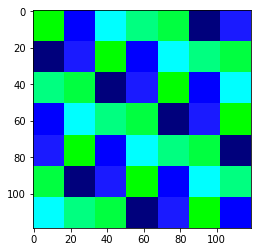

(119, 119, 3)

In [85]:
pictarray = drawSquares(colorList, pictSize)

plt.imshow(pictarray)
plt.show()
pictarray.shape

### Convert to grayscale

First opportunity: Import function

In [86]:
from skimage.color import rgb2gray

Second opportunity: Define function yourself

In [87]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

Remark: You may change the color weights. Those above were taken from Wikipedia ( https://de.wikipedia.org/wiki/Grauwert ).

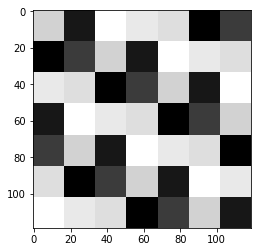

(119, 119)

In [88]:
gray = rgb2gray(pictarray)

cmap = plt.get_cmap('gray')
plt.imshow(gray, norm=None, cmap = cmap)
plt.show()
gray.shape

"gray.shape" gives ( height, width ) $\rightarrow $ only one color layer left

## Digital image filters

 - ready implemented in OpenCV (see https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html)
 - literature: Gonzalez, Woods: Digital Image Processing. Third Edition. PHI Learning Private Limited. New Delhi, 2008. Chapter 3.4

### Theory

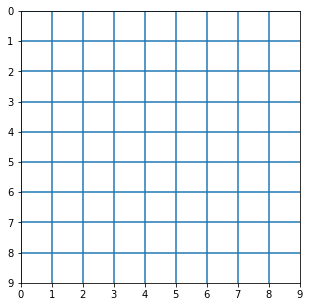

In [39]:
plt.figure(figsize = (5,5))
plt.gca().invert_yaxis()
for i in range ( 0, 9 ):
    plt.axhline( y = i )
    plt.axvline( x = i )
plt.xlim( 0, 9 )
plt.ylim( 9, 0 )
plt.show()

Imagine the grayscale image as table with pixel values.

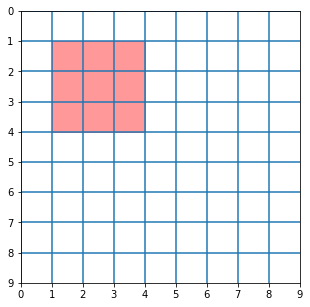

In [48]:
import matplotlib.patches as mpatches
rect = mpatches.Rectangle( (1,1), 3, 3, color = 'red', alpha = 0.4 )

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
plt.gca().invert_yaxis()
for i in range ( 0, 9 ):
    plt.axhline( y = i )
    plt.axvline( x = i )
ax.add_patch(rect)
plt.xlim( 0, 9 )
plt.ylim( 9, 0 )
plt.show()

The red rectangle is called "filter mask" or "kernel". $\rightarrow $ normally square with odd side length <br>
Why odd? To work with integers easily!

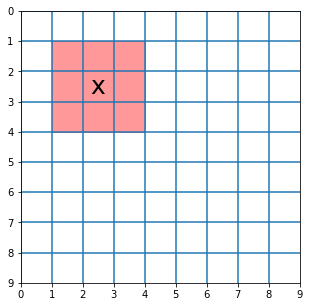

In [56]:
rect = mpatches.Rectangle( (1,1), 3, 3, color = 'red', alpha = 0.4 )
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
plt.gca().invert_yaxis()
for i in range ( 0, 9 ):
    plt.axhline( y = i )
    plt.axvline( x = i )
ax.add_patch(rect)
plt.xlim( 0, 9 )
plt.ylim( 9, 0 )
plt.text(2.25, 2.75, 'x', fontsize = 25)
plt.show()

New value of pixel "x" computed by <br>
$new\: value = \dfrac{1}{m\cdot n}\cdot\sum_{i=1,j=1}^{m,n} value\: picture[i][j]\cdot value\: kernel[i][j] $

### Convolution function

In [59]:
def convolve(kernel,pictpart):

    '''convolution in 2D

    Parameters
    ----------
    kernel : 2D array of numbers
       the filter mask to use
       
    pictpart : 2D array of numbers
       currently active part of the picture
    

    Returns
    -------
    float
       the new color value
    '''
    
    s = 0.0
    temparr=np.multiply(kernel,pictpart)
    s = sum(temparr)
    s = sum(s)
    return s

### Filter function 

In [60]:
def filter_image(pict, kernel):

    '''image filtering

    Parameters
    ----------
    pict : 2D array of numbers
       an image of grayscale values

    kernel : 2D array of numbers
       the filter mask to use

    Returns
    -------
    2D array
       the modified grayscale image
    '''
    
    newpict = pict[0:][0:].copy()
    newpict.fill(0)
    
    pictpart = kernel.copy()
    pictpart.fill(0)

    for i in range(0+(kernel.shape[0]//2),  len(pict)-(kernel.shape[0])):
        for j in range(0+(kernel.shape[1]//2),  len(pict[1])-(kernel.shape[1])):
            
            for k in range(0,  (kernel.shape[0])):
                for l in range(0,  (kernel.shape[1])):
                    pictpart[k][l]=pict[i+k][j+l]
            newpict[i+(kernel.shape[0]//2)][j+(kernel.shape[1]//2)]=convolve(kernel, pictpart)
    return newpict

### Average filter - an example for linear image filters

The kernel is a square nxn and all entries are of the same weight.

In [90]:
n = 5
kernel_average = np.ones((n,n), dtype=np.float32)
kernel_average.fill(1/(n*n))
kernel_average

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

#### The blurred image

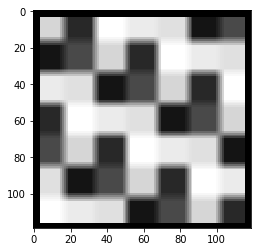

In [91]:
img_average = filter_image(gray, kernel_average)

plt.imshow(img_average, cmap = plt.get_cmap('gray'))
plt.show()

### Unsharp masking - an idea to go on

idea: sharpen the original using the blurred image

#### Difference picture

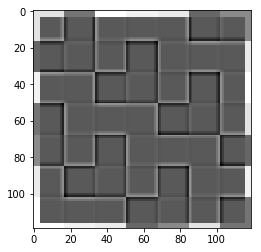

In [92]:
diffPict = gray - img_average
plt.imshow(diffPict, cmap = plt.get_cmap('gray'))
plt.show()

#### Unsharp masking

$\rightarrow $ add difference picture to original grayscale

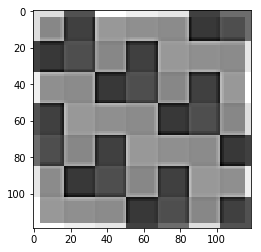

In [94]:
masked = gray + diffPict
plt.imshow(masked, cmap = plt.get_cmap('gray'))
plt.show()

$\rightarrow $ some contrast lost, but edges are visible better than surfaces

### Average filter - all processing results compared

Text(0.5, 1.0, 'Unsharp masked')

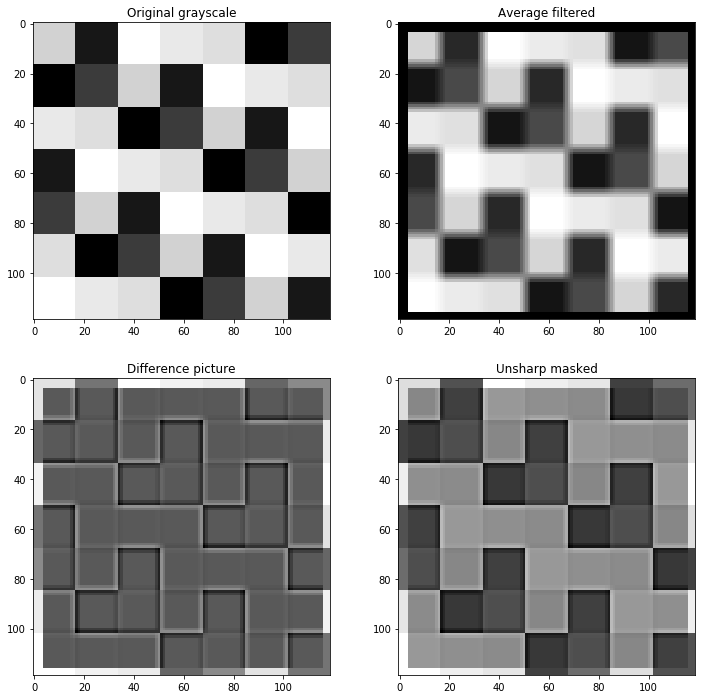

In [99]:
cmap = plt.get_cmap('gray')
fig = plt.figure(figsize = (12,12))
sub1 = plt.subplot(2,2,1)
sub1.imshow(gray, cmap = cmap)
sub1.set_title('Original grayscale')
sub2 = plt.subplot(2,2,2)
sub2.imshow(img_average, cmap = cmap)
sub2.set_title('Average filtered')
sub3 = plt.subplot(2,2,3)
sub3.imshow(diffPict, cmap = cmap)
sub3.set_title('Difference picture')
sub4 = plt.subplot(2,2,4)
sub4.imshow(masked, cmap = cmap)
sub4.set_title('Unsharp masked')

### Gaussian filter - other example for linear filters

In [95]:
def create_gaussiankernel(site=5, sigma=1):
    ax = np.arange(-site // 2 + 1., site // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))

    return kernel / np.sum(kernel)

kernel_gauss = create_gaussiankernel(5,5)

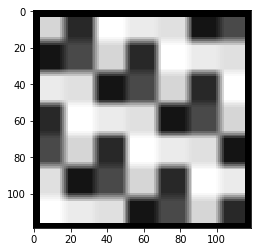

In [96]:
img_gauss = filter_image(gray, kernel_gauss)

plt.imshow(img_gauss, cmap = plt.get_cmap('gray'))
plt.show()

### Non-linear filters

- Median filter: take all pixel values located under the filter mask, sort them and take the value in the middle as new pixel value.
- Maximum filter: see above, but now take the highest value
- Minimum filter: the opposite